# Title: Introduction to PyVista

PyVista is a 3D visualization and analysis library for scientific computing in Python.
It's built on top of VTK (Visualization Toolkit) with a user-friendly API for 3D visualization and data analysis.

PyVista not only wraps VTK's powerful capabilities but also provides a flexible data management system and functionalities.
These functionalities allow you to work seamlessly with NumPy arrays and other high-level APIs in Python.

This tutorial will guide you through the basics of PyVista, including installation, its various data structures,
basic plotting, advanced features like glyphs and filters, and creating a GIF of an oscillating vector field.


# Section 1: Installation

To use PyVista, we first need to install it. We can install it directly within this Jupyter notebook using pip, Python's package installer.

In [1]:
#!pip install pyvista

# Section 2: Importing PyVista

Once installed, we can import PyVista into our notebook.

In [2]:
import pyvista as pv

# Section 3: Introduction to PyVista Data Structures

## What is a mesh?

In PyVista, a mesh is any spatially referenced information, which usually consists of geometrical representations of a surface or volume in 3D space. In all spatially referenced datasets, there lies an underlying mesh structure which is the connectivity between vertices to define cells. Whether those cells are 2D or 3D is not always of importance. If you have a dataset that is a surface mesh with 2D geometries like triangles, we call it a mesh, and if you have a dataset with 3D geometries like voxels, tetrahedra, hexahedra, etc., then we also call that a mesh.

##### Note
This is a very high level overview of the PyVista API. For further details regarding our data model and how it relates to the underlying VTK data model, please see PyVista Data Model.

https://docs.pyvista.org/version/stable/user-guide/data_model.html

## What is a point?
Points are the vertices of the mesh, also referred to as the Cartesian coordinates of the underlying structure. All PyVista datasets (meshes) have points and sometimes, you can have a mesh that only has points, like a point cloud.

For example, you can create a point cloud mesh using the pyvista.PolyData class which is built for meshes that have 1D and 2D cell types (we’ll get into what a cell is briefly).

Let’s start with a point cloud; this is a mesh type that only has vertices. You can create one by defining a 2D array of Cartesian coordinates like so:

/Users/guilleaf/Library/Python/3.11/lib/python/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


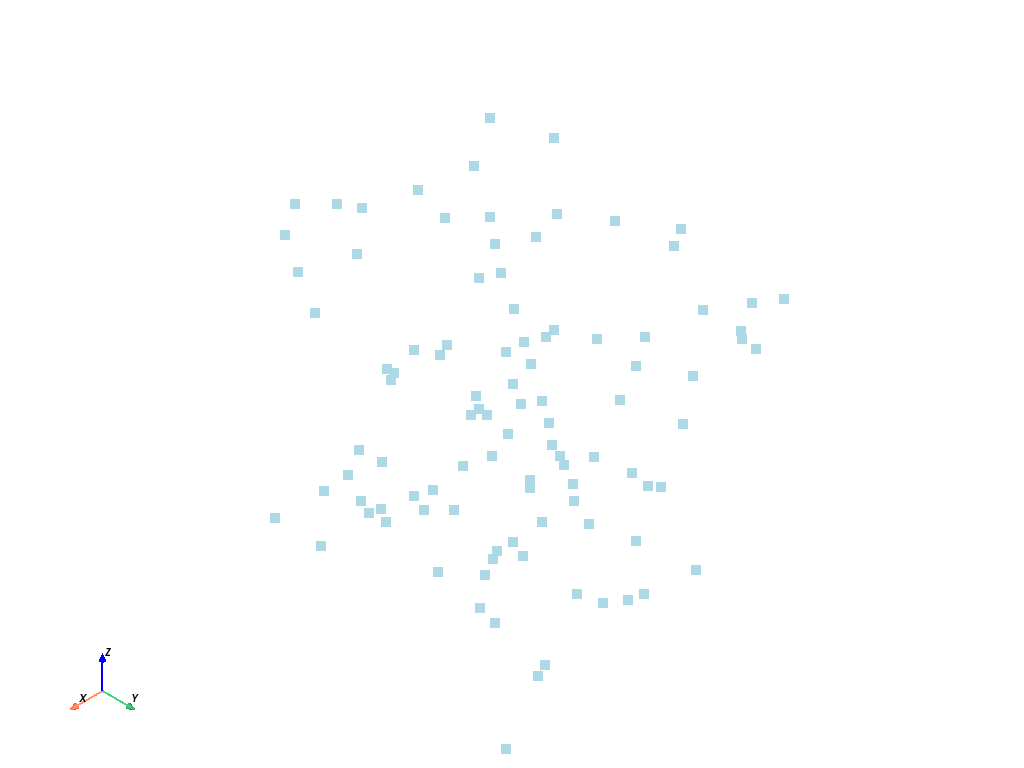

In [3]:
import numpy as np
import pyvista as pv

points = np.random.rand(100, 3)
mesh = pv.PolyData(points)
mesh.plot(point_size=10, style='points')

But it’s important to note that most meshes have some sort of connectivity between points such as this gridded mesh:

/Users/guilleaf/Library/Python/3.11/lib/python/site-packages/pyvista/core/utilities/points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
/Users/guilleaf/Library/Python/3.11/lib/python/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


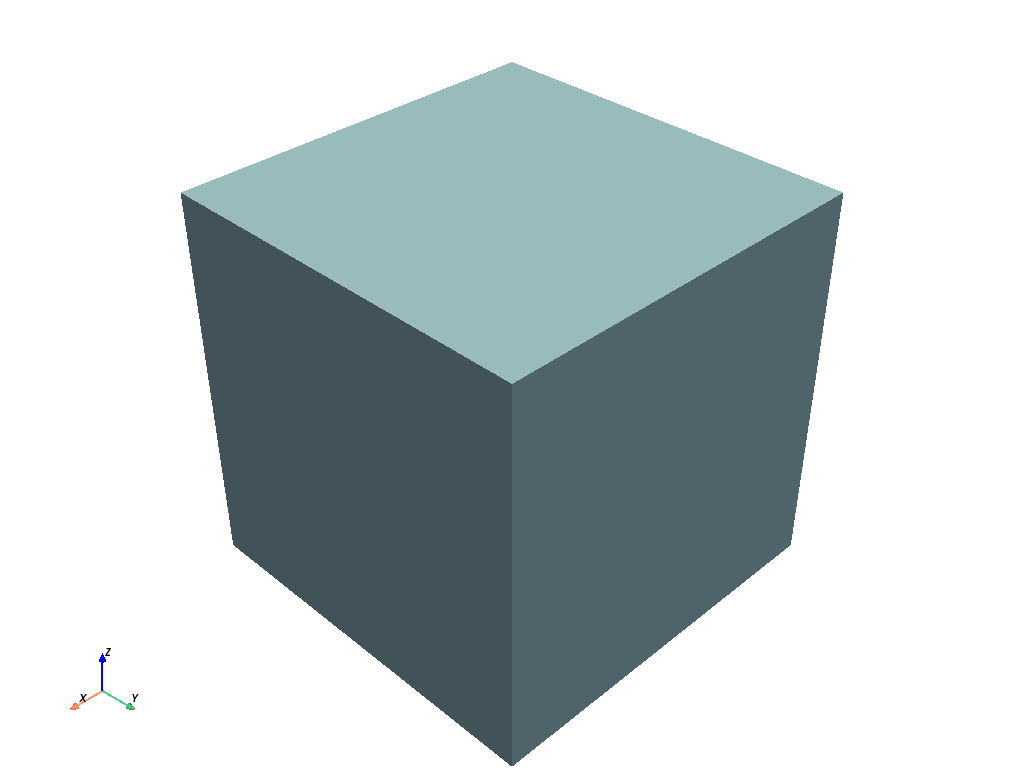

In [4]:
# These are the coordinates for each vertex of the cube
points = [[0, 0, 0],  # point 0
          [1, 0, 0],  # point 1
          [1, 1, 0],  # point 2
          [0, 1, 0],  # point 3
          [0, 0, 1],  # point 4
          [1, 0, 1],  # point 5
          [1, 1, 1],  # point 6
          [0, 1, 1]]  # point 7

# The faces are defined by referring to the index of the points. Each face is a quadrilateral, so the first number indicates how many points follow.
# We have to ensure that the points that define a face follow a consistent winding order (either clockwise or counterclockwise).
faces = [[4, 0, 1, 2, 3],  # face 0
         [4, 4, 5, 6, 7],  # face 1
         [4, 0, 1, 5, 4],  # face 2
         [4, 1, 2, 6, 5],  # face 3
         [4, 2, 3, 7, 6],  # face 4
         [4, 3, 0, 4, 7]]  # face 5


# Here we create the polydata using the points and faces
cube = pv.PolyData(points, faces)

# Now you can plot the cube using the following line
pv.plot(cube)

/Users/guilleaf/Library/Python/3.11/lib/python/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


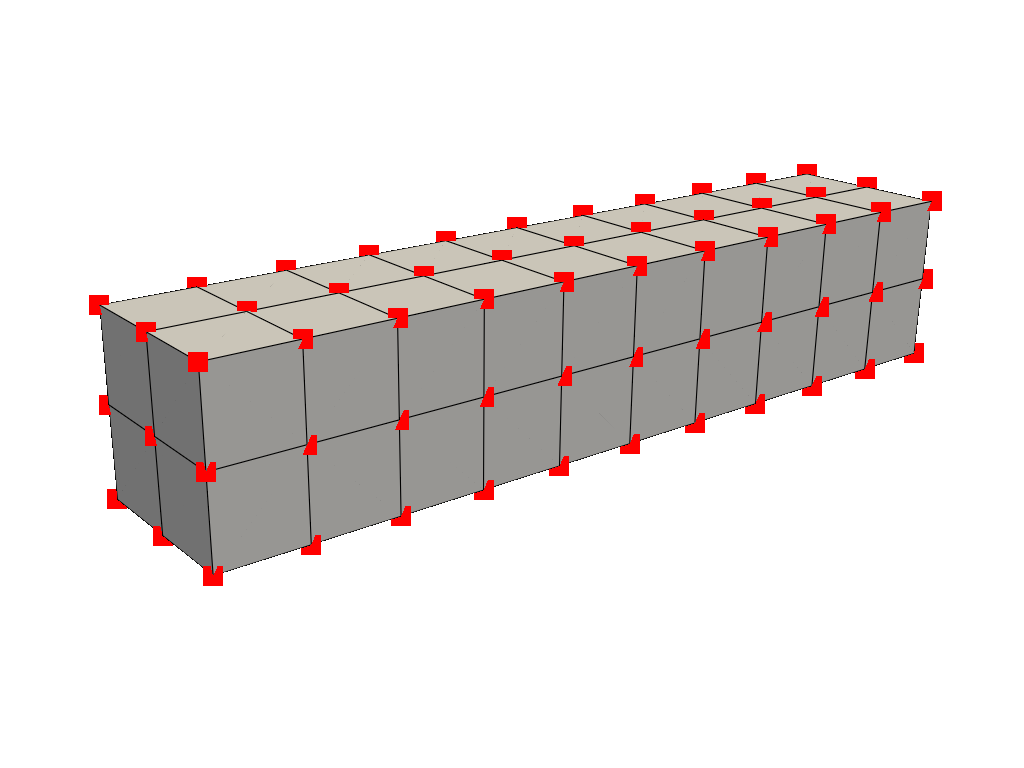

In [5]:
from pyvista import examples

mesh = examples.load_hexbeam()
cpos = [(6.20, 3.00, 7.50),
        (0.16, 0.13, 2.65),
        (-0.28, 0.94, -0.21)]

pl = pv.Plotter()
pl.add_mesh(mesh, show_edges=True, color='white')
pl.add_points(mesh.points, color='red',
              point_size=20)
pl.camera_position = cpos
pl.show()

Or this triangulated surface:

/Users/guilleaf/Library/Python/3.11/lib/python/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


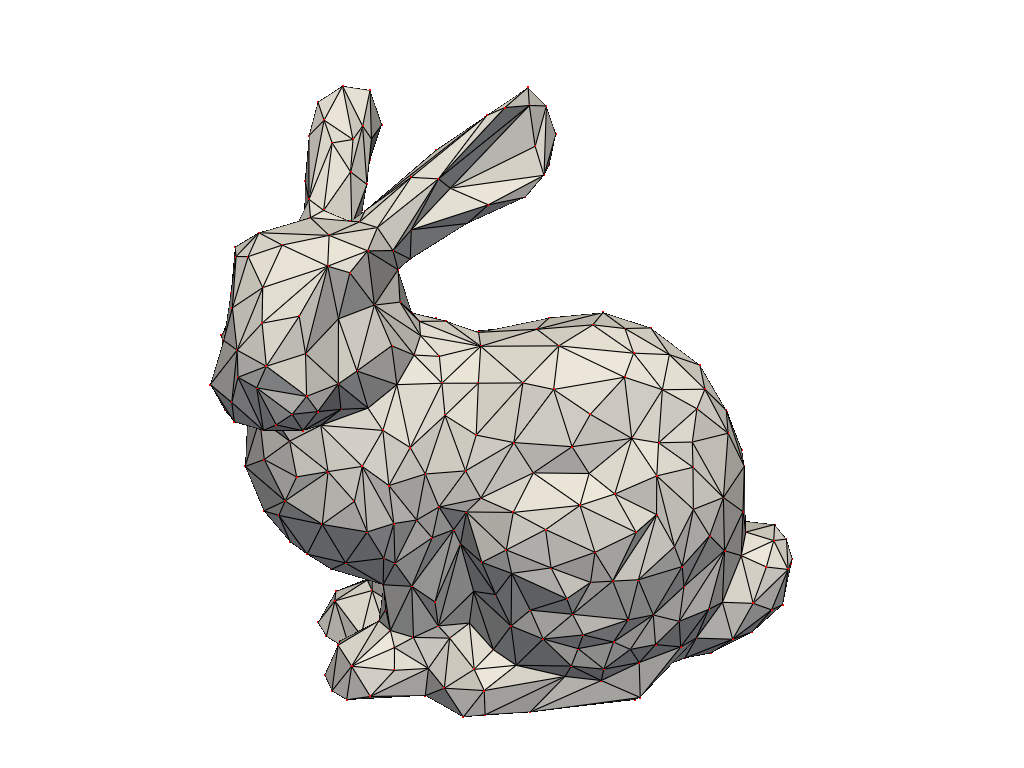

In [6]:
mesh = examples.download_bunny_coarse()

pl = pv.Plotter()
pl.add_mesh(mesh, show_edges=True, color='white')
pl.add_points(mesh.points, color='red',
              point_size=2)
pl.camera_position = [(0.02, 0.30, 0.73),
                      (0.02, 0.03, -0.022),
                      (-0.03, 0.94, -0.34)]
pl.show()

## What is a cell?
A cell is the geometry between points that defines the connectivity or topology of a mesh. Cells could be a triangle between three points, a line between two points, or even a single point could be its own cell.

For example, a cell in the beam example is a voxel defined by the region between eight points in that mesh:

/Users/guilleaf/Library/Python/3.11/lib/python/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


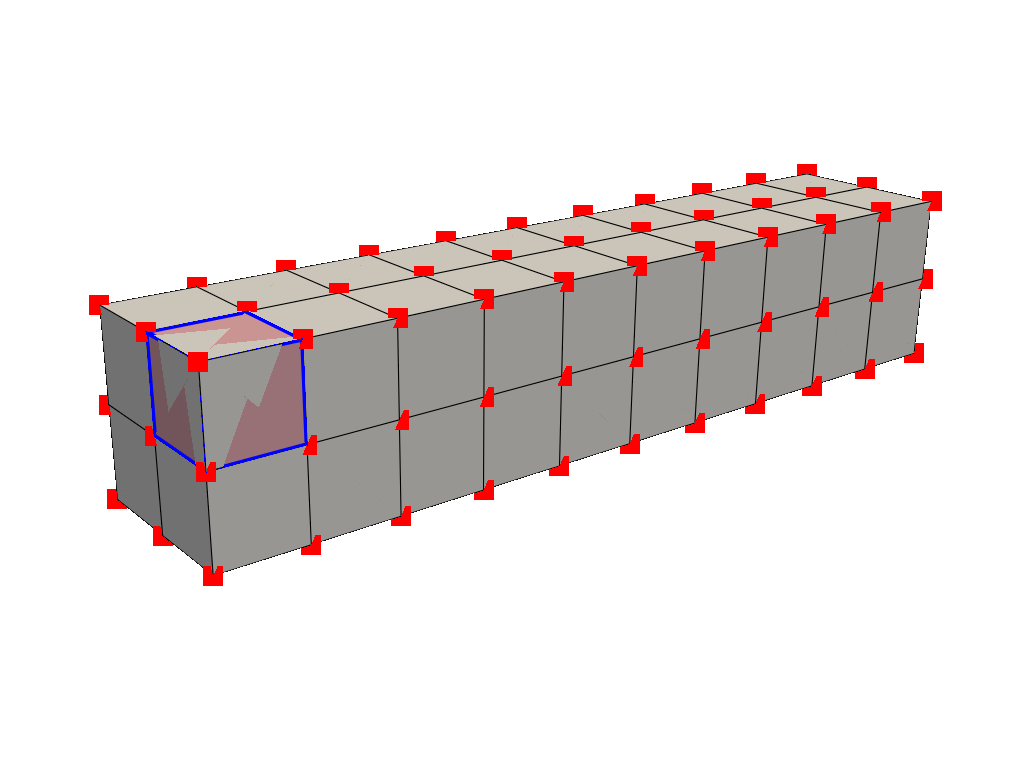

In [7]:
mesh = examples.load_hexbeam()

pl = pv.Plotter()
pl.add_mesh(mesh, show_edges=True, color='white')
pl.add_points(mesh.points, color='red', point_size=20)

single_cell = mesh.extract_cells(mesh.n_cells - 1)
pl.add_mesh(single_cell, color='pink', edge_color='blue',
            line_width=5, show_edges=True)

pl.camera_position = [(6.20, 3.00, 7.50),
                      (0.16, 0.13, 2.65),
                      (-0.28, 0.94, -0.21)]
pl.show()

## What are attributes?

Attributes are data values that live on either the points or cells of a mesh. In PyVista, we work with both point data and cell data and allow easy access to data dictionaries to hold arrays for attributes that live either on all points or on all cells of a mesh. These attributes can be accessed in a dictionary-like attribute attached to any PyVista mesh accessible as one of the following:

- point_data

- cell_data

- field_data

#### Point Data
Point data refers to arrays of values (scalars, vectors, etc.) that live on each point of the mesh. Each element in an attribute array corresponds to a point in the mesh. Let’s create some point data for the beam mesh. When plotting, the values between points are interpolated across the cells.

/Users/guilleaf/Library/Python/3.11/lib/python/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


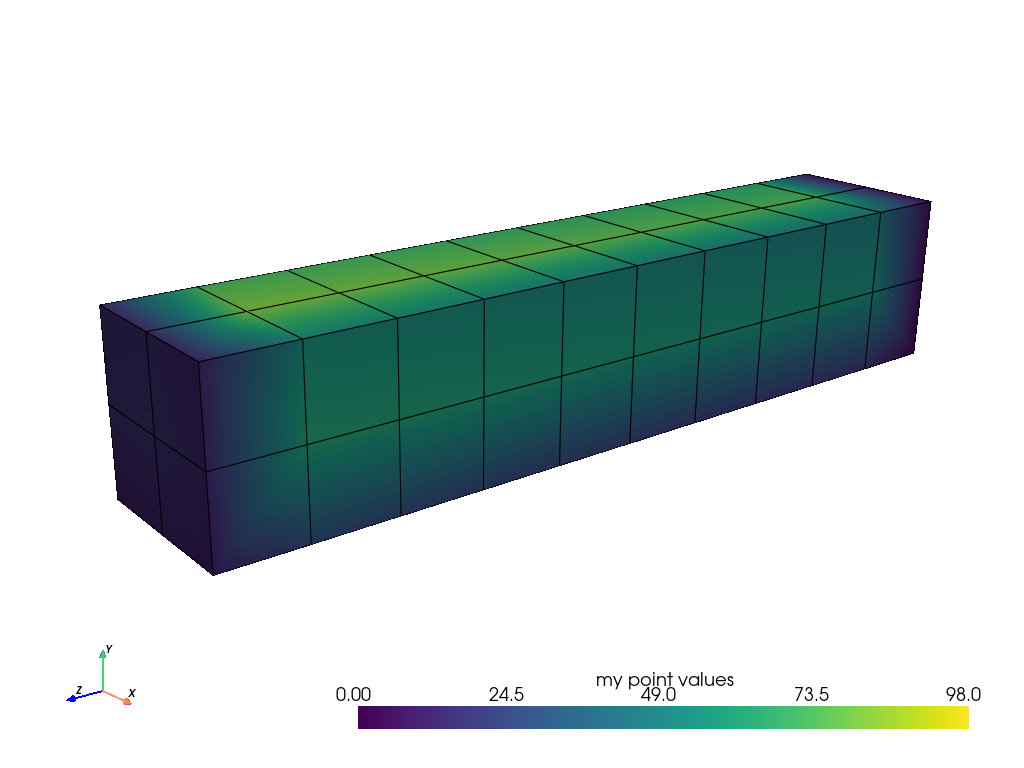

In [8]:
mesh.point_data['my point values'] = np.arange(mesh.n_points)
mesh.plot(scalars='my point values', cpos=cpos, show_edges=True)

You can also assign multi-dimenstional arrays as well

/Users/guilleaf/Library/Python/3.11/lib/python/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


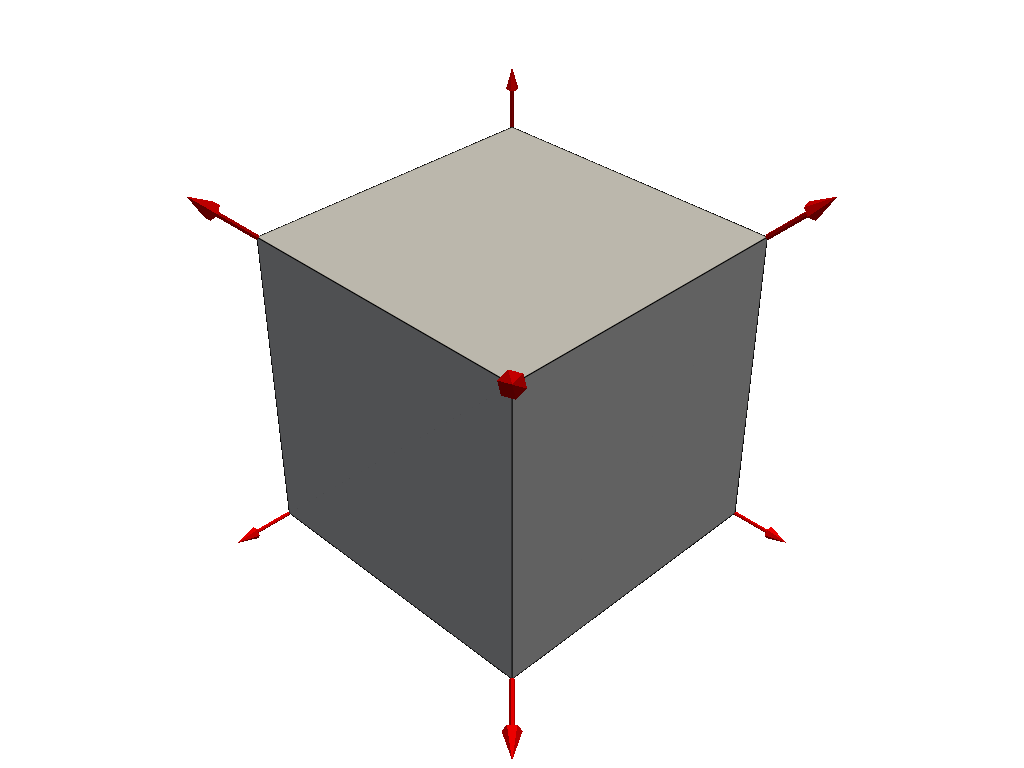

In [9]:
# Here, we will just use the point coordinates as the vector data.
vector_data = cube.points

# Now we store this vector data in the point data of the cube.
# We will call this data "vectors"
cube.point_data["vectors"] = vector_data

# Now let's create arrow glyphs for each point to visualize the vector data.
glyphs = cube.glyph(orient="vectors", scale="vectors", factor=0.2)

# Plot the original cube and the glyphs
p = pv.Plotter()
p.add_mesh(cube, color="lightgrey", show_edges=True)
p.add_mesh(glyphs, color="red")
p.show()


#### Cell Data
Cell data refers to arrays of values (scalars, vectors, etc.) that live throughout each cell of the mesh. That is the entire cell (2D face or 3D volume) is assigned the value of that attribute.

/Users/guilleaf/Library/Python/3.11/lib/python/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


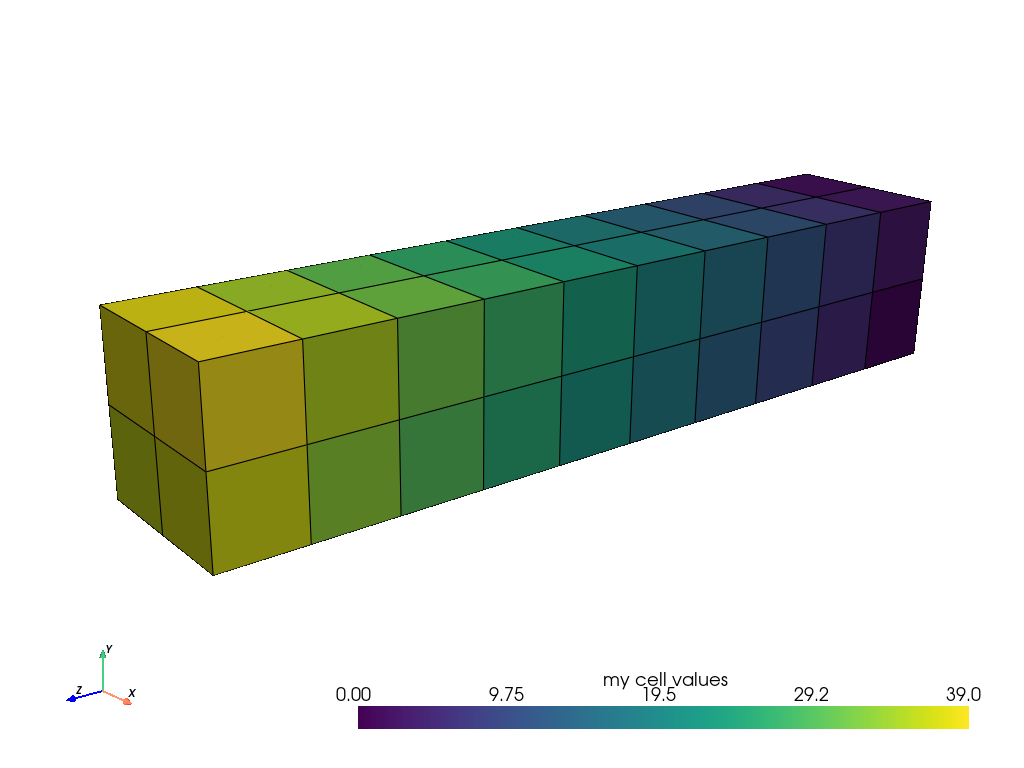

In [10]:
mesh.cell_data['my cell values'] = np.arange(mesh.n_cells)
mesh.plot(scalars='my cell values', cpos=cpos, show_edges=True)

Here’s a comparison of point data versus cell data and how point data is interpolated across cells when mapping colors. This is unlike cell data which has a single value across the cell’s domain:

/Users/guilleaf/Library/Python/3.11/lib/python/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


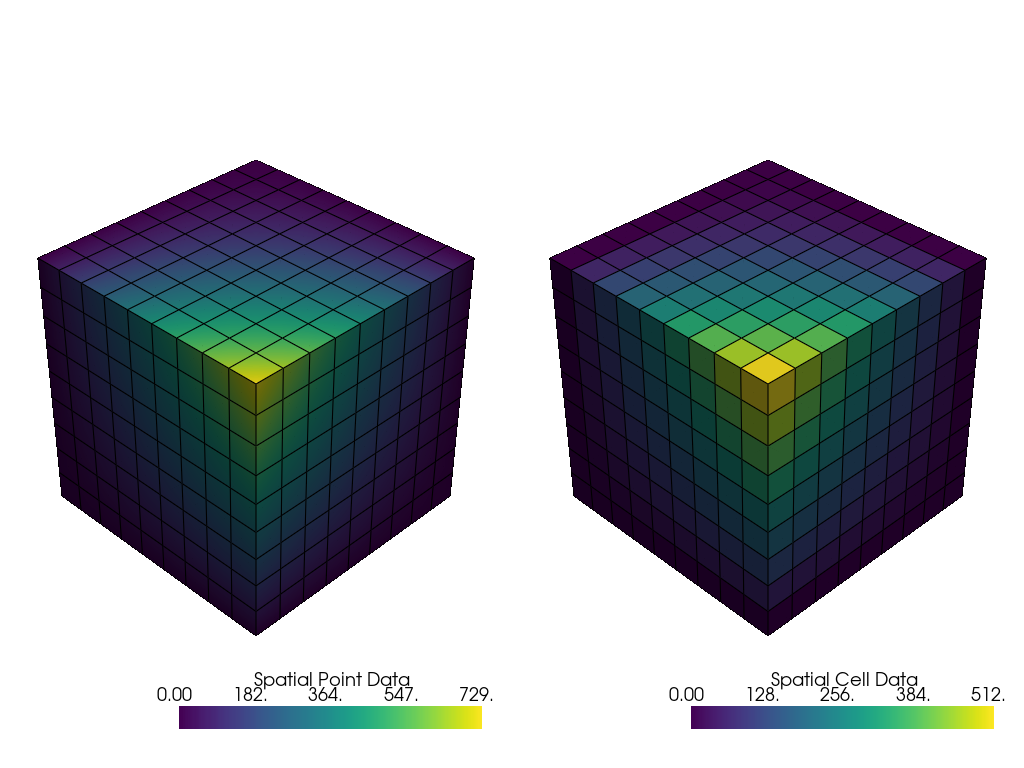

In [11]:
import pyvista as pv
from pyvista import examples
uni = examples.load_uniform()

pl = pv.Plotter(shape=(1, 2), border=False)
pl.add_mesh(uni, scalars='Spatial Point Data', show_edges=True)
pl.subplot(0, 1)
pl.add_mesh(uni, scalars='Spatial Cell Data', show_edges=True)
pl.show()

#### Field Data
Field data is not directly associated with either the points or cells but still should be attached to the mesh. This may be a string array storing notes, or even indices of a Collision.

#### Closing remarks
If you are ever curious about what is stored in a pyvista object, you can easily just print the object to see information.

In [12]:
grid = examples.download_coil_magnetic_field()
print(grid)

ImageData (0x140447be0)
  N Cells:      512000
  N Points:     531441
  X Bounds:     -4.000e+01, 4.000e+01
  Y Bounds:     -4.000e+01, 4.000e+01
  Z Bounds:     -4.000e+01, 4.000e+01
  Dimensions:   81, 81, 81
  Spacing:      1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:     1


You can also check the information stored in cell_data and point_data

In [13]:
print(grid.point_data)

pyvista DataSetAttributes
Association     : POINT
Active Scalars  : B
Active Vectors  : B
Active Texture  : None
Active Normals  : None
Contains arrays :
    B                       float64    (531441, 3)          VECTORS


In [14]:
print(grid.cell_data)

pyvista DataSetAttributes
Association     : CELL
Active Scalars  : None
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays : None


In [15]:
print(grid.field_data)

pyvista DataSetAttributes
Association     : NONE
Contains arrays : None


# Section 4: Using Filters

Filters in PyVista are used to transform your data in some way. This could include operations such as extracting a subset of the data, generating new data from existing data, or processing the data in a certain way.

Filters can perform tasks such as:

- Slicing and cutting meshes

- Computing mesh properties like volume, area, and surface normals

- Mesh decimation

- Extract regions of one mesh using another mesh’s surface

- Ray tracing through surface meshes

- Resampling and interpolating scalar/vector values across meshes

- Integrating a vector field to generate streamlines

- Smoothing surfaces

Let's go through some examples of using filters in PyVista.


#### Example 1:  Slice filter
The slice filter can cut your mesh using a slice plane.

/Users/guilleaf/Library/Python/3.11/lib/python/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


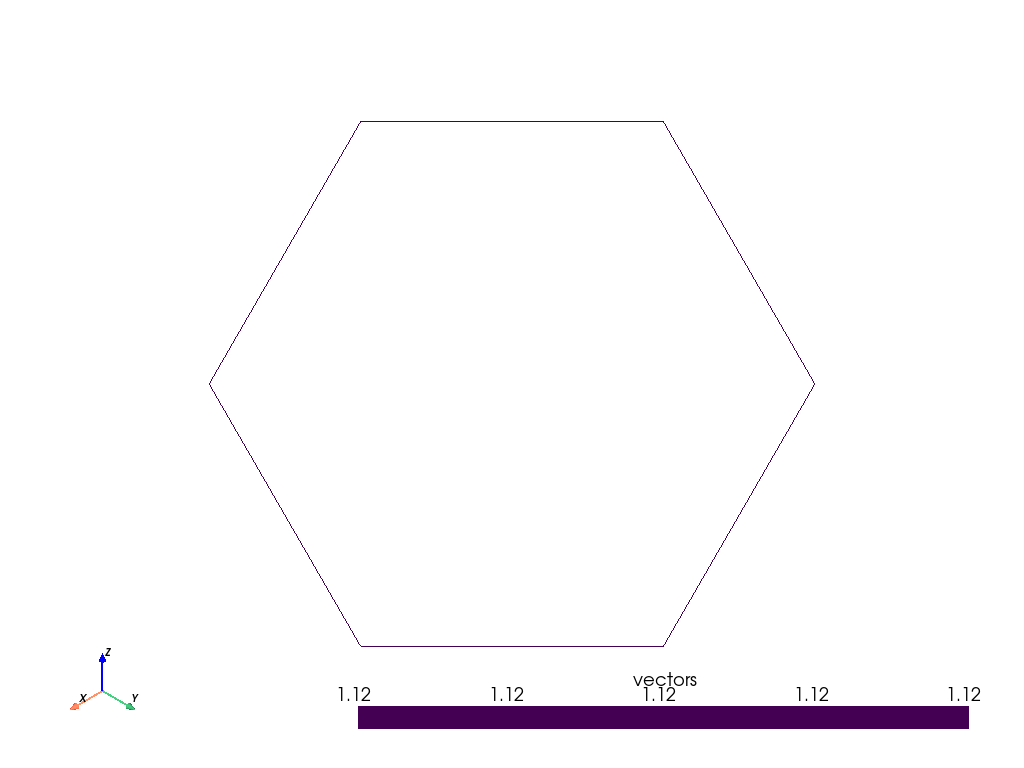

In [16]:
sliced = cube.slice(normal=[1, 1, 1])
pv.plot(sliced)

#### Example 2:  Shrink filter
The `shrink` filter can be used to shrink the individual cells of a mesh to provide a visual gap between each cell.

/Users/guilleaf/Library/Python/3.11/lib/python/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


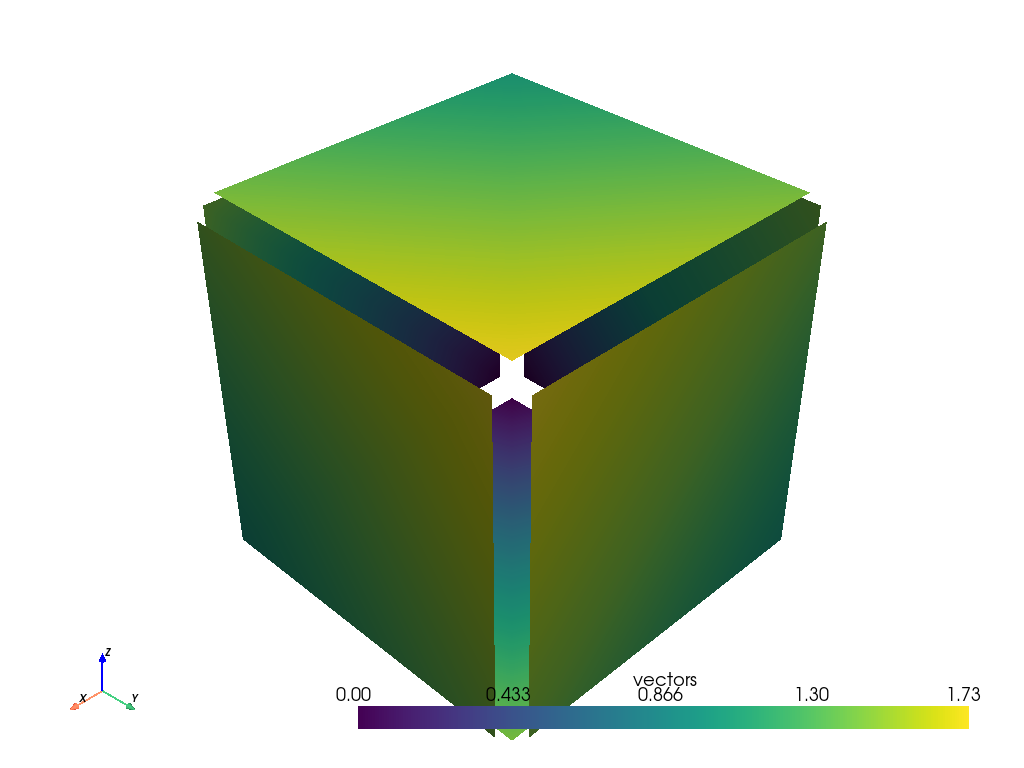

In [17]:
shrunk = cube.shrink(shrink_factor=0.9)
pv.plot(shrunk)

#### Example 3: delaunay_2d filter
The `delaunay_2d` filter projects the points of the dataset to a plane and triangulates them. 

The triangulation is performed in the plane defined by a user specified normal.

/Users/guilleaf/Library/Python/3.11/lib/python/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


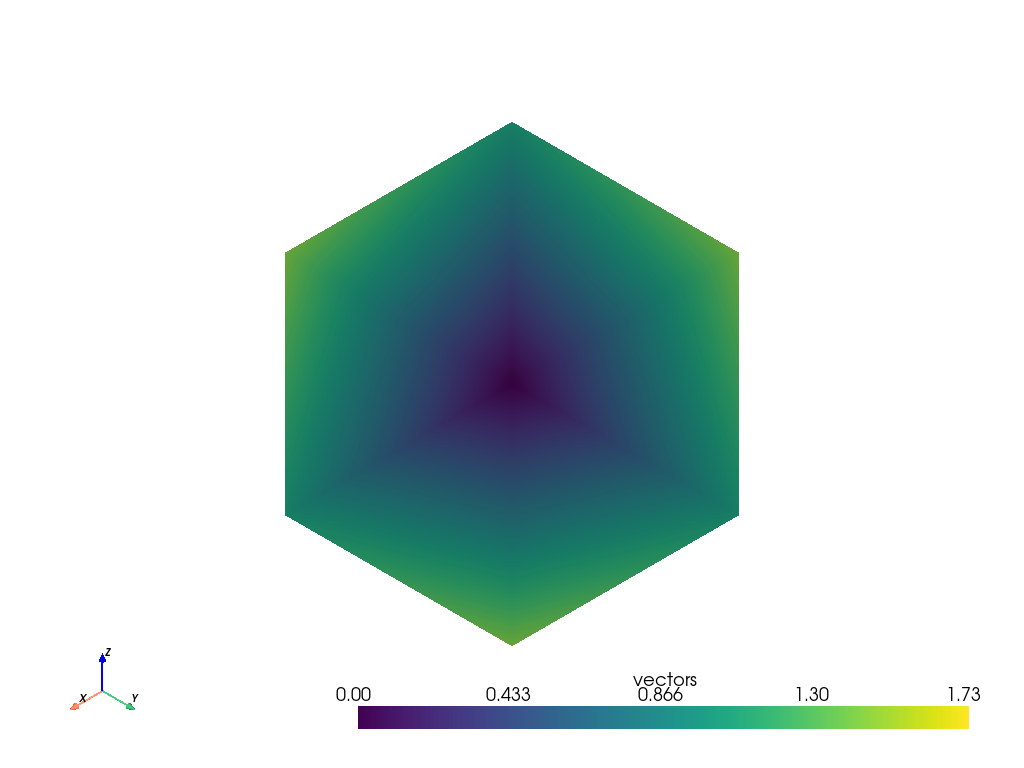

In [18]:
projected = cube.project_points_to_plane(normal=[1, 1, 1])
triangulated = projected.delaunay_2d()
pv.plot(triangulated)

# Section 5: Glyphs

Glyphs are geometric objects that can represent the complexity of a data point in a simplified manner.
They are especially useful when visualizing vector fields, as they can provide a more intuitive understanding of the data's direction and magnitude.

In PyVista, we use the `glyph` filter to generate glyphs for a given dataset. This process involves taking an input mesh (our data) and a source mesh (the shape of the glyph), and placing a source glyph at every point of the input mesh.

In the first part of this section, we will generate a spherical mesh and add a vector field to it. We will then generate arrow glyphs that represent this vector field.

The second part of this section introduces custom glyphs. Any arbitrary geometry can serve as the source mesh for our glyphs. In our case, we will use a cone as our custom glyph to represent the same vector field on the spherical mesh.

/Users/guilleaf/Library/Python/3.11/lib/python/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


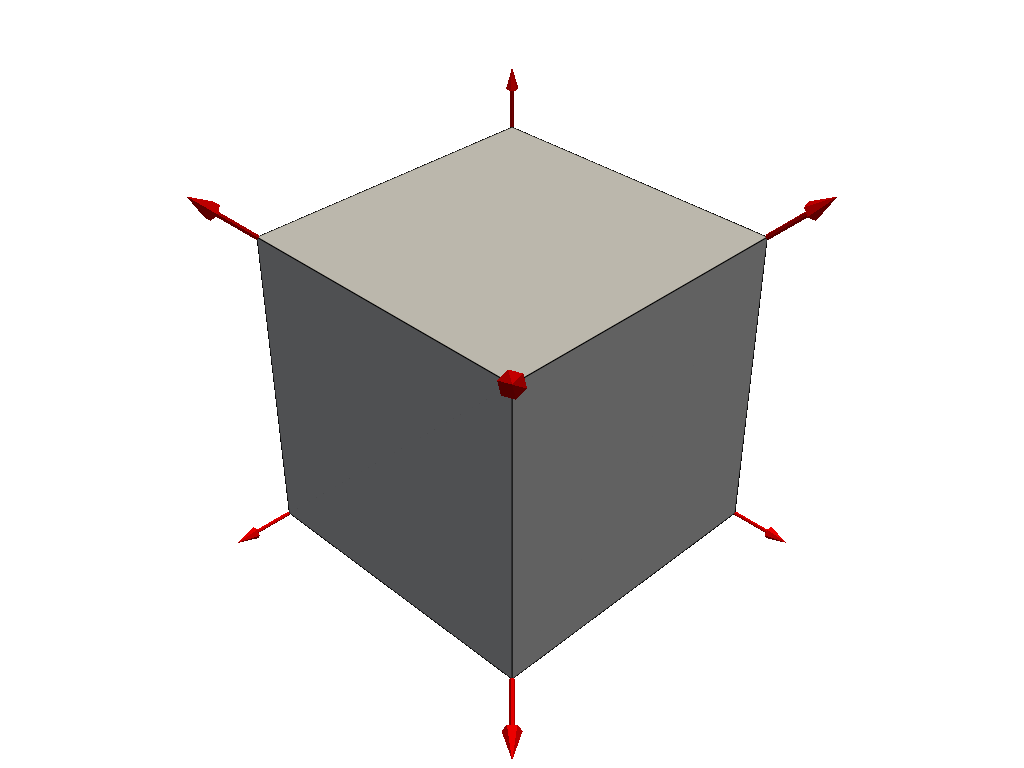

/Users/guilleaf/Library/Python/3.11/lib/python/site-packages/pyvista/jupyter/notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


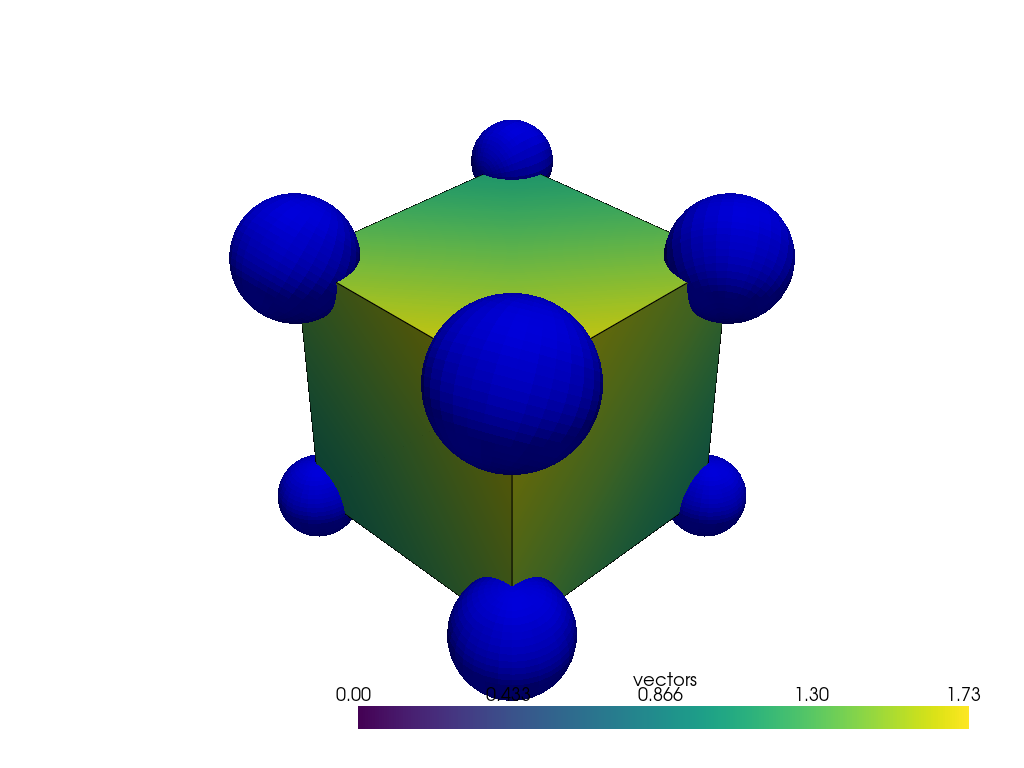

In [19]:
# Let's create some simple vector data for each point.
# Here, we will just use the point coordinates as the vector data.
vector_data = cube.points

# Now we store this vector data in the point data of the cube.
# We will call this data "vectors"
cube.point_data["vectors"] = vector_data

# Now let's create arrow glyphs for each point to visualize the vector data.
glyphs = cube.glyph(orient="vectors", scale="vectors", factor=0.2)

# Plot the original cube and the glyphs
p = pv.Plotter()
p.add_mesh(cube, color="lightgrey", show_edges=True)
p.add_mesh(glyphs, color="red")
p.show()


# Now, let's create a custom glyph. We will use a cone for this example.
sphere = pv.Sphere()

# Now we can use the `glyph` filter again, but this time we pass our custom cone glyph.
custom_glyphs = cube.glyph( factor=0.3, geom=sphere)

p = pv.Plotter()
p.add_mesh(custom_glyphs, color="blue")
p.add_mesh(cube, show_edges=True)
p.show()


# Section 6: Using the pv.Plotter class and Creating GIFs

The `pv.Plotter` class in PyVista is the primary class used for visualizing your 3D data. 
You can use it to add your meshes to a scene, apply different colors and properties to them, 
and finally render the scene.

Here are some other ways you could use the `pv.Plotter` class:

- Multi-Panel Plots: You can use the `subplot` method of `pv.Plotter` to create multi-panel plots. This is useful when you want to display multiple related plots side by side.

- Adding Legends: You can use the `add_legend` method to add a legend to your plot. This can be helpful when visualizing datasets with different categories.

- Interactive Plotting: By calling the `show` method of `pv.Plotter`, a window will open displaying the current scene. You can interact with this window to rotate, zoom, and pan the scene.

- Adding Text: You can use the `add_text` method to add text annotations to your plots. This can be useful for adding labels or titles to your visualizations.

- Saving Plots: The `save` method can be used to save the current scene as an image file.



The `pv.Plotter` class also allows us to create animations of our data, which can be saved as GIFs. 
In this section, we will create an animation of an oscillating vector field and save it as a GIF.

In [20]:
# Let's first create a simple mesh to visualize.
mesh = pv.Sphere(radius=3.0, center=(0, 0, 0))

# We will create a vector field that oscillates over time.
# The vectors will rotate about the z-axis.

# We create a Plotter object and add our mesh to it.
plotter = pv.Plotter()

# Open a gif
plotter.open_gif("oscillating_vector_field.gif")

# Let's make 20 frames for our gif.
n_frames = 20
for i in range(n_frames):
    # Clear the plotter
    plotter.clear()
    
    # Calculate the vectors for this frame
    vectors = np.zeros((mesh.n_points, 3))
    vectors[:, 0] = np.sin(2.0 * np.pi * i / n_frames) * mesh.points[:, 0]
    vectors[:, 1] = np.cos(2.0 * np.pi * i / n_frames) * mesh.points[:, 1]
    
    # Add the vectors to the mesh
    mesh['vectors'] = vectors
    
    # Generate the glyphs for this frame
    glyphs = mesh.glyph(orient="vectors", scale="vectors", factor=0.2)
    
    # Add the glyphs to the plotter
    plotter.add_mesh(glyphs, color="red")
    
    # Add the mesh to the plotter
    plotter.add_mesh(mesh, show_edges=True)
    
    # Write this frame to the gif
    plotter.write_frame()

# Close the gif
plotter.close()


# Used to open image in jupyter notebook
from IPython.display import Image

# Use IPython's display.Image to load the GIF and display it in the notebook
Image(filename="oscillating_vector_field.gif")

ModuleNotFoundError: Install imageio to use `open_gif` with:

   pip install imageio

# Section 7: Visualizing the Electric Field of a Point-Like Particle
In this section, we will use PyVista to visualize the electric field of a point-like particle. 
The electric field is a vector field that shows the direction and strength of the force 
that a positive test charge would experience at any given point in space. 

We will create a point-like particle at the origin and compute the electric field at points 
in a 3D grid around the origin. We will use the `streamlines_from_source` method of the 
`pv.Plotter` class to visualize the electric field lines, and the `add_volume` method to 
create a volume rendering of the electric field strength.


In [ ]:
# First, let's define the position of our point-like particle (we'll put it at the origin)
particle_position = np.array([0, 0, 0])

# Now let's create a 3D grid of points around the origin
grid = pv.UniformGrid()
grid.dimensions = [50, 50, 50]
grid.origin = [-10, -10, -10]
grid.spacing = [0.4, 0.4, 0.4]

# We'll compute the electric field at each point in the grid
points = grid.points
r = points - particle_position
r_magnitude = np.linalg.norm(r, axis=1)

# Define the charge of our point-like particle (in coulombs)
q = 1.0

# Define the permittivity of free space (in C^2/N·m^2)
epsilon_0 = 8.854e-12

# Compute the electric field vector at each point
# r_magnitude is one dimensional array of all the magnitures, but this has to be expamped to match the dimensions of r
# Here, we will only be looking at the spatial variation so we will divide the prefactor and the the charge 
E = r / np.expand_dims(r_magnitude**3, axis=1)



# Compute the magnitude of the electric field
E_magnitude = np.linalg.norm(E, axis=1)

# Add the electric field magnitude to the grid
grid["E_magnitude"] = E_magnitude

# Add the electric field to the grid
grid["E"] = E

# Now we'll create a Plotter and add the grid to it. outline will get the boundry outline of the grid.
plotter = pv.Plotter()
plotter.add_mesh(grid.outline(), color="k")

# We'll use the `streamlines_from_source` method to visualize the electric field lines
sphere = pv.Sphere(1)
seed = sphere.decimate(target_reduction=0.9)
streamlines = grid.streamlines_from_source(seed,
                                        vectors="E",
                                        max_time=180,
                                        initial_step_length=0.1,
                                        integration_direction='both')

plotter.add_mesh(streamlines, color="b", line_width=2, render_lines_as_tubes=True)

# We'll use the `add_volume` method to create a volume rendering of the electric field strength
# We'll use a coolwarm colormap to indicate the direction of the electric field
plotter.add_volume(grid, scalars="E_magnitude", cmap="coolwarm", clim=[-1, 1])

# Finally, let's display our plot
plotter.show()

# Conclusion and Further Reading
Congratulations on reaching the end of this tutorial! By now, you should have a good understanding 
of how to use PyVista for visualizing 3D data. We've only scratched the surface of what's possible 
with this powerful library, so we encourage you to continue exploring.

A great place to continue your learning is the PyVista examples page, which can be found at:
https://docs.pyvista.org/examples/index.html
